# Isosteric enthalpy calculation

In order to calculate isosteric enthalpy, at least two isotherms which were taken at slighly different temperatures are required. First, make sure the data is imported.

In [1]:
%run import.ipynb

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


Let's quickly plot the isotherms to see how they look. We put the temperature of the experiment in the legend by using the `lgd_keys` keyword.

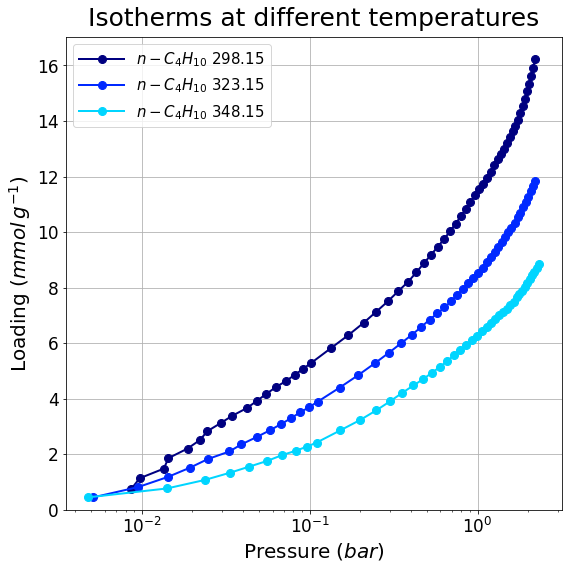

In [2]:
pygaps.plot_iso(isotherms_isosteric, branch='ads', 
                lgd_keys=['adsorbate', 'temperature'],
                logx = True,
                fig_title='Isotherms at different temperatures')
plt.show()

The isotherms look good, except perhaps a bit of measurement error in the low pressure region.

The isosteric enthalpy calculation takes the list of the isotherms and returns the results as a dictionary. Using the `verbose` keyword, we also generate a graph.

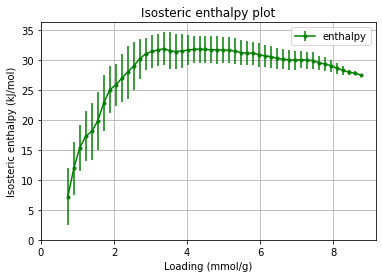

In [3]:
result_dict = pygaps.isosteric_enthalpy(isotherms_isosteric, verbose=True)
plt.show()

More information about the functions and their use can be found in the [manual](../manual/characterisation.rst).